# Extract the database and info
[Link to dataset](https://www.kaggle.com/datasets/cristaliss/ryanair-reviews-ratings)


In [3]:
import pandas as pd

# load CSV in a Panda Dataset 
df = pd.read_csv('ryanair_reviews.csv')

df.head()

,Unnamed: 0,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,...,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,...,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,...,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,...,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,...,Liverpool,January 2024,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,...,Manchester,January 2024,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


## Example for undarstanding the most common words of the Reviews 

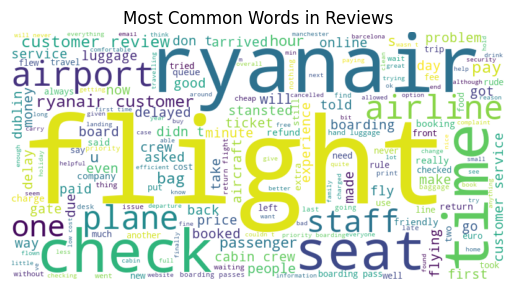

Word cloud image saved as wordcloud_reviews.png


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import re

# Load the dataset
df = pd.read_csv('ryanair_reviews.csv')

# Combine 'Comment title' and 'Comment' into 'Full Comment'
df['Full Comment'] = df['Comment title'] + " " + df['Comment']

# Preprocessing: Remove nulls and clean the text
df = df.dropna(subset=['Full Comment'])

# Clean the comments: remove non-alphanumeric characters and lowercase the text
def clean_text(text):
    text = re.sub(r'\W+', ' ', text)
    text = text.lower()
    return text

df['cleaned comments'] = df['Full Comment'].apply(clean_text)

# Combine all cleaned comments into one string
all_comments = ' '.join(df['cleaned comments'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')

# Save the word cloud image
wordcloud_file = 'wordcloud_reviews.png'
plt.savefig(wordcloud_file, format='png')

# Show the word cloud
plt.show()

print(f'Word cloud image saved as {wordcloud_file}')


## Text mining preprocessing


In [4]:

import re
from unidecode import unidecode
import geonamescache
import airportsdata 

# Initialize geonamescache
gc = geonamescache.GeonamesCache()

def replace_time_with_category(comment):
    # Define patterns to identify different time references
    time_patterns = {
        r'\b(21|22|23|00|01|02|03|04|05)(am|pm|:|\b)': '_night_',
        r'\b(06|07|08|09|10|11|12)(am|pm|:|\b)': '_morning_',
        r'\b(01|02|03|04|05|06)(pm|:|\b)': '_afternoon_',
        r'\b(07|08)(pm|:|\b)': '_evening_',
        r'\b\d{1,3}\s?(s|min|mins|h|hour|yr|hrs|hours|day|days|minute| minutes| month| months| year| years|hr|yrs)\b': '_time_',
        r'\b(s|min|mins|h|hour|hrs|hours|day|days|minute|minutes|month|months|year|years|hr)\b': '_time_'
    }
    
    # Replace the patterns in the comment
    for pattern, replacement in time_patterns.items():
        comment = re.sub(pattern, replacement, comment, flags=re.IGNORECASE)
    
    return comment

def replace_money_references(text):
    # Define patterns to identify different money references
    currency_patterns = [
        r'\b(dollars?|euros?|pounds?|yen|rupees?|eur|usd|gbp|jpy|inr)\b',
        r'\b\d+\s?(dollars?|euros?|pounds?|yen|rupees?|eur|usd|gbp|jpy|inr)\b',  # Numbers followed by currency names
        r'\$\d+(\.\d+)?', r'£\d+(\.\d+)?', r'€\d+(\.\d+)?', r'¥\d+(\.\d+)?', r'₹\d+(\.\d+)?',
        r'\d+\s?\$', r'\d+\s?£', r'\d+\s?€', r'\d+\s?¥', r'\d+\s?₹'  # Numbers followed by currency symbols
    ]
    # Replace the patterns in the text
    for pattern in currency_patterns:
        text = re.sub(pattern, '_price_', text, flags=re.IGNORECASE)
    return text

def replace_weight_references(text):
    # Define patterns to identify different weight references
    weight_patterns = [
        r'\b\d+(\.\d+)?\s?(kg|kgs|g|grams|mg|lbs|pounds)\b',
        r'\b\d+(kg|kgs|g|grams|mg|lbs|pounds| chilo |chilos )\b'
    ]
    # Replace the patterns in the text
    for pattern in weight_patterns:
        text = re.sub(pattern, '_weight_', text, flags=re.IGNORECASE)
    return text

def replace_size_references(text):
    # Define patterns to identify different size references
    size_patterns = [
        r'\b\d+(\.\d+)?\s?(cm|m|meter|meters|inch|in|ft|foot|feet|metres| metre )\b',
        r'\b\d+(cm|m|meter|meters|inch|in|ft|foot|feet)\b',
        r'\b\d+(yr|yrs|yard|yards)\b',
        r'\b(yr|yrs|yard|yards)\b'
    ]
    # Replace the patterns in the text
    for pattern in size_patterns:
        text = re.sub(pattern, '_size_', text, flags=re.IGNORECASE)
    return text

def replace_date_references(text):
    # List of months to identify date references
    months = [
        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
    ]
    date_patterns = []
    # Create patterns for dates including months
    for month in months:
        date_patterns.append(rf'\b{month} \d{{1,2}}(?:st|nd|rd|th)?(?:, \d{{4}})?\b')
        date_patterns.append(rf'\b\d{{1,2}}(?:st|nd|rd|th)? {month}(?:, \d{{4}})?\b')
    date_patterns.append(r'\b\d{4}\b')  # Pattern for years
    # Replace the patterns in the text
    for pattern in date_patterns:
        text = re.sub(pattern, '_date_', text, flags=re.IGNORECASE)
    return text

def replace_city_references(text):
    # Define European countries to filter city references
    european_countries = set([
        'AD', 'AL', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CH', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE',
        'IT', 'LV', 'LI', 'LT', 'LU', 'MT', 'MD', 'MC', 'ME', 'NL', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI',
        'ES', 'SE', 'CH', 'UA', 'GB', 'VA'
    ])
    # Get city names from geonamescache
    cities = gc.get_cities()
    city_names = {city['name'] for city in cities.values() if city['countrycode'] in european_countries}
    # Create patterns for city names
    city_patterns = [rf'\b{re.escape(city)}\b' for city in city_names]
    # Replace the patterns in the text
    for pattern in city_patterns:
        text = re.sub(pattern, '_city_', text, flags=re.IGNORECASE)
    return text

def replace_country_references(text):
    # Get country names from geonamescache
    countries = gc.get_countries()
    country_names = {country['name'] for country in countries.values()}
    # Create patterns for country names
    country_patterns = [rf'\b{re.escape(country)}\b' for country in country_names]
    # Replace the patterns in the text
    for pattern in country_patterns:
        text = re.sub(pattern, '_country_', text, flags=re.IGNORECASE)
    return text

def replace_weekday_references(text):
    # List of weekdays to identify weekday references
    weekdays = [
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
        'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'
    ]
    # Create patterns for weekdays
    weekday_patterns = [rf'\b{day}\b' for day in weekdays]
    # Replace the patterns in the text
    for pattern in weekday_patterns:
        text = re.sub(pattern, '_dayweek_', text, flags=re.IGNORECASE)
    return text

def find_european_airports():
    # Define European countries to filter airport references
    european_countries = [
        'AD', 'AL', 'AT', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'DE', 'GR', 'HU', 'IS', 'IE',
        'IT', 'LV', 'LI', 'LT', 'LU', 'MT', 'MD', 'MC', 'ME', 'NL', 'NO', 'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI',
        'ES', 'SE', 'CH', 'UA', 'GB', 'VA'
    ]
    # Load all airports from airportsdata
    airports = airportsdata.load()
    # Filter European airports
    european_airports = {icao: airport['name'] for icao, airport in airports.items() if airport['country'] in european_countries}
    return european_airports

def replace_airport_references(text):
    # Get European airports
    european_airports = find_european_airports()
    # Create patterns for airport names
    airport_patterns = [rf'\b{re.escape(name)}\b' for name in european_airports.values()]
    # Replace the patterns in the text
    for pattern in airport_patterns:
        text = re.sub(pattern, '_airport_', text, flags=re.IGNORECASE)
    return text

def remove_superfluous_numbers(text):
    # Remove ordinal numbers (e.g., 1st, 2nd)
    text = re.sub(r'\b\d+(?:th|nd|rd|st)\b', '', text)
    # Remove other stand-alone numbers
    text = re.sub(r'\b\d+\b', '', text)
    return text


def process_text(text):
    # Process the text
    text = replace_time_with_category(text)
    text = replace_money_references(text)
    text = replace_weight_references(text)

    text = replace_size_references(text)
    text = replace_date_references(text)
  #  text = replace_city_references(text)  # Uncomment if needed
   # text = replace_country_references(text)
    text = replace_weekday_references(text)  # New addition 
    #text = replace_airport_references(text)  # New addition
    text = remove_superfluous_numbers(text)
    return text


In [5]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import spacy
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import geonamescache
import airportsdata 
import unicodedata
from sklearn.model_selection import train_test_split
import pickle

# Get the English stopwords as a list
stop_words = stopwords.words('english')

# Initialize spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Initialize geonamescache
gc = geonamescache.GeonamesCache()

def filter_nouns(text):
        doc= nlp(text)
        filtered_text = ' '.join([token.lemma_ for token in doc if token.pos_ in ['NOUN']])
        return filtered_text

def filter_adjectives(text):
        doc= nlp(text)
        filtered_text = ' '.join([token.lemma_ for token in doc if token.pos_ in ['ADJ']])
        return filtered_text
# Initialize CountVectorizer with English stopwords and other options
vectorizer_LDA = CountVectorizer(stop_words=stop_words, max_df=0.85, min_df=45)
vectorizer_Bayesian = CountVectorizer(stop_words=stop_words, max_df=0.95, min_df=20)
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.95, min_df=20)

# Combine 'Comment title' and 'Comment' into a new column 'Full Comment'
df["Full Comment"] = df["Comment title"] + " " + df["Comment"]

# Split the data into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Process text and filter nouns for LDA dataset
LDA_train = train_df["Full Comment"].apply(filter_nouns).apply(process_text)
LDA_test = test_df["Full Comment"].apply(filter_nouns).apply(process_text)

# Process text and filter adjectives for Bayesian Classifier dataset
Bayesian_train = train_df["Full Comment"].apply(filter_adjectives)
Bayesian_test = test_df["Full Comment"].apply(filter_adjectives)

# Apply CountVectorizer to LDA training dataset
X_LDA_train_vector = vectorizer_LDA.fit_transform(LDA_train)
X_LDA_test_vector = vectorizer_LDA.transform(LDA_test)

# Apply CountVectorizer to Bayesian Classifier training dataset
X_Bayesian_train_vector = vectorizer_Bayesian.fit_transform(Bayesian_train)
X_Bayesian_test_vector = vectorizer_Bayesian.transform(Bayesian_test)

# Process full comments for general analysis
final_train_dataset = train_df["Full Comment"].apply(process_text)
final_test_dataset = test_df["Full Comment"].apply(process_text)

final_train_vector = vectorizer.fit_transform(final_train_dataset)
final_test_vector = vectorizer.transform(final_test_dataset)

# Convert results to DataFrame for better visualization
vectorized_df_LDA_train = pd.DataFrame(X_LDA_train_vector.toarray(), columns=vectorizer_LDA.get_feature_names_out())
vectorized_df_LDA_test = pd.DataFrame(X_LDA_test_vector.toarray(), columns=vectorizer_LDA.get_feature_names_out())

vectorized_df_Bayesian_train = pd.DataFrame(X_Bayesian_train_vector.toarray(), columns=vectorizer_Bayesian.get_feature_names_out())
vectorized_df_Bayesian_test = pd.DataFrame(X_Bayesian_test_vector.toarray(), columns=vectorizer_Bayesian.get_feature_names_out())

vectorized_df_train = pd.DataFrame(final_train_vector.toarray(), columns=vectorizer.get_feature_names_out())
vectorized_df_test = pd.DataFrame(final_test_vector.toarray(), columns=vectorizer.get_feature_names_out())

# Optionally remove the last column (if needed)
vectorized_df_LDA_train = vectorized_df_LDA_train.drop(vectorized_df_LDA_train.columns[-1], axis=1)
vectorized_df_LDA_test = vectorized_df_LDA_test.drop(vectorized_df_LDA_test.columns[-1], axis=1)

vectorized_df_Bayesian_train = vectorized_df_Bayesian_train.drop(vectorized_df_Bayesian_train.columns[-1], axis=1)
vectorized_df_Bayesian_test = vectorized_df_Bayesian_test.drop(vectorized_df_Bayesian_test.columns[-1], axis=1)

vectorized_df_train = vectorized_df_train.drop(vectorized_df_train.columns[-1], axis=1)
vectorized_df_test = vectorized_df_test.drop(vectorized_df_test.columns[-1], axis=1)

# Show the Vectorized DataFrame for LDA
print("Vectorized DataFrame for LDA Train:")
print(vectorized_df_LDA_train)
print("\nVectorized DataFrame for LDA Test:")
print(vectorized_df_LDA_test)

# Show the Vectorized DataFrame for Bayesian Classifier
print("\nVectorized DataFrame for Bayesian Classifier Train:")
print(vectorized_df_train)
print("\nVectorized DataFrame for Bayesian Classifier Test:")
print(vectorized_df_Bayesian_test)

# Add the 'Recommended' column to the Bayesian vectorized DataFrame
vectorized_df_Bayesian_train['Recommended'] = train_df['Recommended'].values
vectorized_df_Bayesian_test['Recommended'] = test_df['Recommended'].values

# Save the last value of 'Full Comment' in a new CSV file
last_full_comment = df.iloc[-1]['Full Comment']
last_comment_df = pd.DataFrame({'Full Comment': [last_full_comment]})
last_comment_df.to_csv('last_full_comment.csv', index=False)
with open('vectorizers_and_objects.pkl', 'wb') as f:
    pickle.dump({
        'vectorizer_LDA': vectorizer_LDA,
        'vectorizer_Bayesian': vectorizer_Bayesian
    }, f)


print(f"\nLast Full Comment saved to 'last_full_comment.csv':\n{last_full_comment}")


Vectorized DataFrame for LDA Train:
      _price_  _time_  agent  air  aircraft  airline  airport  announcement  \
0           0       2      0    0         0        0        0             0   
1           0       5      0    0         0        0        0             0   
2           0       0      0    0         0        0        0             0   
3           0       2      0    0         0        0        0             0   
4           0       2      0    0         0        0        1             0   
...       ...     ...    ...  ...       ...      ...      ...           ...   
1794        0       0      0    0         0        0        0             0   
1795        2       3      5    0         0        3        1             0   
1796        0       2      0    0         0        1        1             0   
1797        0       1      0    0         0        0        1             0   
1798        1       0      0    0         0        0        0             0   

      app  arri

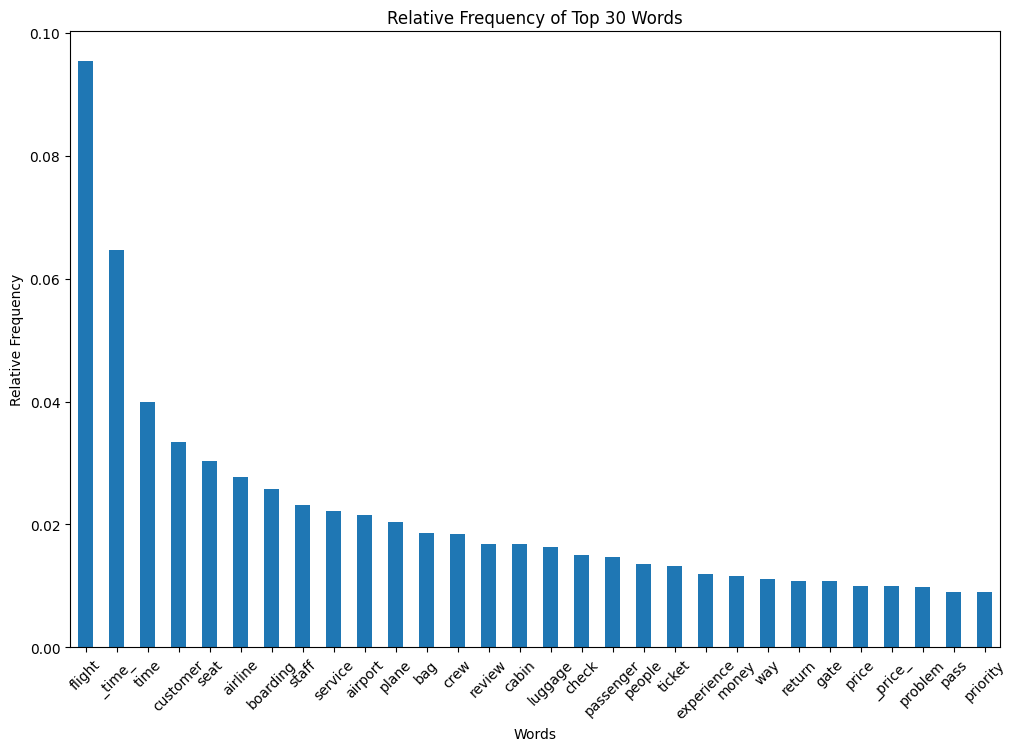

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the DataFrame to numeric to ensure all values are numeric
vectorized_df_LDA = vectorized_df_LDA_train.apply(pd.to_numeric, errors='coerce').fillna(0)

# Calculate word frequencies across the DataFrame
word_frequencies = vectorized_df_LDA.sum(axis=0)

# Get the top 30 words by frequency
top_30_words = word_frequencies.sort_values(ascending=False).head(30)

# Calculate the total number of words
total_words = vectorized_df_LDA.sum().sum()

# Calculate the relative frequency of the top 30 words
top_30_word_frequencies = top_30_words / total_words


# Plot the relative frequency of the top 30 words
plt.figure(figsize=(12, 8))
top_30_word_frequencies.plot(kind='bar')
plt.title('Relative Frequency of Top 30 Words')
plt.xlabel('Words')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Check sparsity of the matrix
def check_sparsity(matrix):
    non_zero_elements = matrix.nnz
    total_elements = matrix.shape[0] * matrix.shape[1]
    sparsity = 1 - (non_zero_elements / total_elements)
    return sparsity

# Number of words in the vocabulary
def get_vocabulary_size(vectorizer):
    return len(vectorizer.vocabulary_)

# Check sparsity and vocabulary size for LDA vectorizer
lda_sparsity = check_sparsity(X_LDA_train_vector)
lda_vocab_size = get_vocabulary_size(vectorizer_LDA)

print(f"LDA Vectorizer Sparsity: {lda_sparsity}")
print(f"LDA Vocabulary Size: {lda_vocab_size}")

# Check sparsity and vocabulary size for Bayesian vectorizer
bayesian_sparsity = check_sparsity(X_Bayesian_train_vector)
bayesian_vocab_size = get_vocabulary_size(vectorizer_Bayesian)

print(f"Bayesian Vectorizer Sparsity: {bayesian_sparsity}")
print(f"Bayesian Vocabulary Size: {bayesian_vocab_size}")



LDA Vectorizer Sparsity: 0.9037853109705893
LDA Vocabulary Size: 133
Bayesian Vectorizer Sparsity: 0.9640631741799057
Bayesian Vocabulary Size: 143


# LDA find the number of argument by perplexity

n_components: 5, Fold: 1, Perplexity: 91.1608, Time: 6.35s
n_components: 5, Fold: 2, Perplexity: 88.7165, Time: 4.17s
n_components: 5, Fold: 3, Perplexity: 90.1116, Time: 4.11s
n_components: 5, Fold: 4, Perplexity: 91.5577, Time: 4.30s
n_components: 5, Fold: 5, Perplexity: 90.9288, Time: 4.19s
n_components: 5, Average Perplexity: 90.4951
n_components: 6, Fold: 1, Perplexity: 96.5453, Time: 3.97s
n_components: 6, Fold: 2, Perplexity: 93.8745, Time: 3.99s
n_components: 6, Fold: 3, Perplexity: 94.9087, Time: 4.05s
n_components: 6, Fold: 4, Perplexity: 97.0949, Time: 6.00s
n_components: 6, Fold: 5, Perplexity: 95.9171, Time: 4.44s
n_components: 6, Average Perplexity: 95.6681
n_components: 7, Fold: 1, Perplexity: 98.1568, Time: 3.94s
n_components: 7, Fold: 2, Perplexity: 96.7040, Time: 3.82s
n_components: 7, Fold: 3, Perplexity: 97.4542, Time: 5.31s
n_components: 7, Fold: 4, Perplexity: 98.9639, Time: 6.05s
n_components: 7, Fold: 5, Perplexity: 97.8093, Time: 3.82s
n_components: 7, Average 

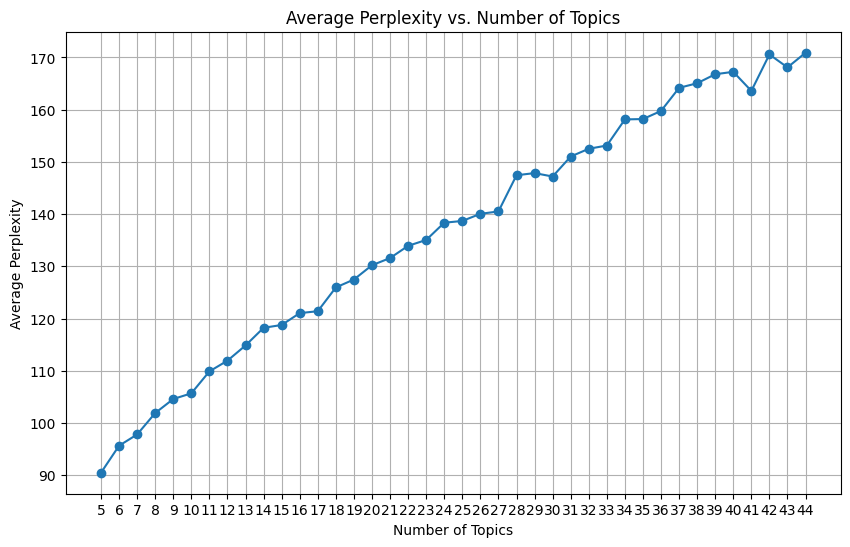

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
# Assuming X_LDA_train_vector and LDA_train are properly defined from previous step
import time

# Range of n_components (number of topics) to evaluate

# Number of folds for cross-validation
k = 5
kf = KFold(n_splits=k)
X = X_LDA_train_vector
n_components_range = range(5, 45)
# Dictionary to store average perplexity for each n_components
average_perplexities = {}

for n_components in n_components_range:
    perplexities = []
    fold_number = 1
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]

        # Initialize and fit LDA model
        lda = LatentDirichletAllocation(n_components=n_components,
                                        learning_method='online',
                                        random_state=42)
        t0 = time.time()
        lda.fit(X_train)

        # Calculate and store perplexity on the test set
        perplexity = lda.perplexity(X_test)
        perplexities.append(perplexity)

        print(f"n_components: {n_components}, Fold: {fold_number}, Perplexity: {perplexity:.4f}, Time: {time.time() - t0:.2f}s")
        fold_number += 1

    # Calculate the average perplexity across all folds for current n_components
    average_perplexity = np.mean(perplexities)
    average_perplexities[n_components] = average_perplexity

    # Print the average perplexity for the current n_components
    print(f"n_components: {n_components}, Average Perplexity: {average_perplexity:.4f}")

# Find the n_components with the lowest average perplexity
optimal_n_components = min(average_perplexities, key=average_perplexities.get)
optimal_perplexity = average_perplexities[optimal_n_components]

print(f"\nOptimal number of topics (n_components): {optimal_n_components}, with Average Perplexity: {optimal_perplexity:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(list(n_components_range), list(average_perplexities.values()), marker='o')
plt.title('Average Perplexity vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Average Perplexity')
plt.xticks(list(n_components_range))
plt.grid(True)
plt.show()


## LDA TOPIC EXTRACTION

In [8]:
# Esecuzione dell'analisi LDA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import KFold
# Assuming X_LDA_train_vector and LDA_train are properly defined from previous step
import time
n_topics = 19
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=10, learning_method='online', learning_offset=50., random_state=42)
t0 = time.time()
lda.fit(X_LDA_train_vector)
print(f"LDA Training completed in {time.time() - t0:.3f}s.")

# Funzione per ottenere le parole principali per ciascun topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

# Ottenere le parole principali per ciascun topic
top_words = get_top_words(lda, vectorizer_LDA.get_feature_names_out(), n_top_words=5)
print("Top words per topic:")
for idx, words in enumerate(top_words):
    print(f"Topic {idx}: {', '.join(words)}")

# Calcolare le probabilità dei topic per ciascun documento
topic_probabilities_train = lda.transform(X_LDA_train_vector)
topic_probabilities_test = lda.transform(X_LDA_test_vector)

# Creare DataFrame per le probabilità dei topic
topic_probabilities_train_df = pd.DataFrame(topic_probabilities_train, columns=[f'Topic {i}' for i in range(n_topics)])
topic_probabilities_test_df = pd.DataFrame(topic_probabilities_test, columns=[f'Topic {i}' for i in range(n_topics)])

# Concatenare le probabilità dei topic con il DataFrame originale
vectorized_df_train = pd.concat([vectorized_df_train, topic_probabilities_train_df], axis=1)
vectorized_df_test = pd.concat([ vectorized_df_test,topic_probabilities_test_df], axis=1)
# Salva il modello LDA su un file
with open('lda_model.pkl', 'wb') as file:
    pickle.dump(lda, file)



LDA Training completed in 3.721s.
Top words per topic:
Topic 0: weather, kg, price, aircraft, employee
Topic 1: _time_, flight, gate, staff, time
Topic 2: check, _price_, fee, agent, airport
Topic 3: flight, seat, aircraft, value, option
Topic 4: flight, _time_, service, customer, time
Topic 5: seat, plane, front, row, attendant
Topic 6: luggage, hand, boarding, priority, flight
Topic 7: money, suitcase, value, water, flight
Topic 8: airline, experience, cost, budget, money
Topic 9: information, change, charge, drink, air
Topic 10: bag, staff, cabin, baggage, flight
Topic 11: booking, legroom, ground, fault, staff
Topic 12: flight, crew, time, cabin, _time_
Topic 13: ticket, price, trip, luggage, time
Topic 14: seat, leg, room, family, child
Topic 15: price, seat, problem, priority, policy
Topic 16: week, destination, lot, case, time
Topic 17: announcement, schedule, budget, person, airport
Topic 18: boarding, pass, customer, flight, _time_


## Interpretation of topic

C:\Users\Acer\AppData\Local\Temp\ipykernel_11308\273086156.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_topic_value_percentage.values, y=sorted_topic_value_percentage.index, palette='viridis')


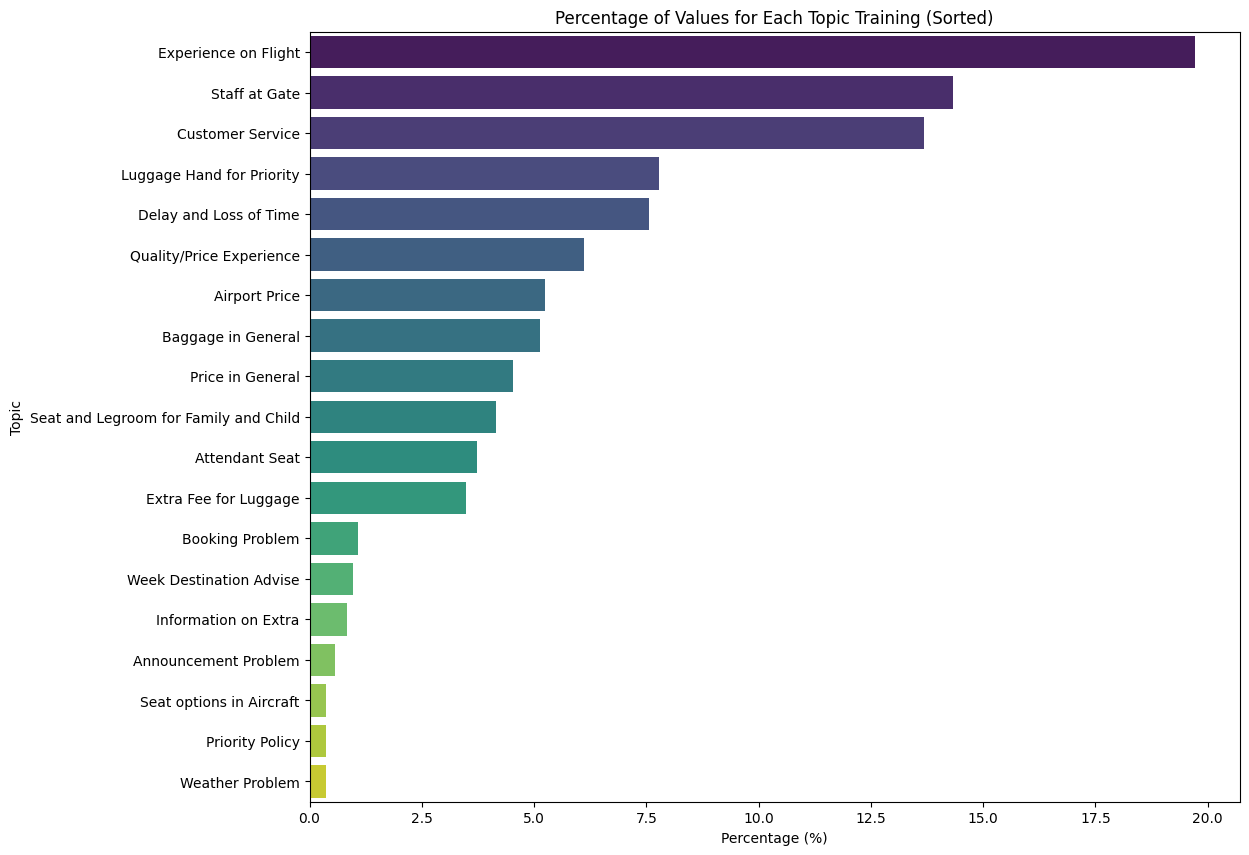

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume top_words is defined elsewhere
# print(top_words)  # Uncomment this if top_words is defined and you want to see it

# Define new topic names
new_topic_names = {
    'Topic 0': 'Weather Problem',
    'Topic 1': 'Staff at Gate',
    'Topic 2': 'Airport Price',
    'Topic 3': 'Seat options in Aircraft',
    'Topic 4': 'Customer Service',
    'Topic 5': 'Attendant Seat',
    'Topic 6': 'Luggage Hand for Priority',
    'Topic 7': 'Extra Fee for Luggage',
    'Topic 8': 'Quality/Price Experience',
    'Topic 9': 'Information on Extra',
    'Topic 10': 'Baggage in General',
    'Topic 11': 'Booking Problem',
    'Topic 12': 'Experience on Flight',
    'Topic 13': 'Price in General',
    'Topic 14': 'Seat and Legroom for Family and Child',
    'Topic 15': 'Priority Policy',
    'Topic 16': 'Week Destination Advise',
    'Topic 17': 'Announcement Problem',
    'Topic 18': 'Delay and Loss of Time'
}

def visualize_topic_percentages(data, new_topic_names, title_suffix):
    """
    Visualize the percentage distribution of topics.

    Args:
        data (pd.DataFrame): The DataFrame with topic data.
        new_topic_names (dict): Dictionary mapping old topic names to new names.
        title_suffix (str): Suffix to be used in the plot title.
    """
    # Rename columns
    data = data.rename(columns=new_topic_names)
    
    # Filter DataFrame to include only the topic columns
    filtered_topics = list(new_topic_names.values())
    data_filtered = data[filtered_topics]

    # Calculate the sum of values for each topic
    topic_values_sum = data_filtered.sum(axis=0)

    # Calculate the percentage of the total for each topic
    total_values_sum = topic_values_sum.sum()
    topic_value_percentage = (topic_values_sum / total_values_sum) * 100

    # Sort topics by percentage in descending order
    sorted_topic_value_percentage = topic_value_percentage.sort_values(ascending=False)

    # Plot the percentages with horizontal bar plot
    plt.figure(figsize=(12, 10))
    sns.barplot(x=sorted_topic_value_percentage.values, y=sorted_topic_value_percentage.index, palette='viridis')
    plt.title(f'Percentage of Values for Each Topic {title_suffix} (Sorted)')
    plt.xlabel('Percentage (%)')
    plt.ylabel('Topic')
    plt.show()

# Visualize topic percentages for the training dataset
visualize_topic_percentages(vectorized_df_train, new_topic_names, 'Training')


## Find adjective customer sentiment weights by Bayesian approach 

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import MultinomialNB
import numpy as np

# Assume df has already been defined and vectorized_df_Bayesian is prepared
# Assume X_Bayesian_train_vector is the vectorized data and contains 'Recommended' column

# Convert 'Recommended' column to binary (1 for 'yes', 0 for 'no')
df['Recommended'] = df['Recommended'].map({'yes': 1, 'no': 0})

# Split data into training and testing sets
X_Bayesian_train_vector = vectorizer_Bayesian.transform(Bayesian_train)  # Vectorize the training data
X_Bayesian_test_vector = vectorizer_Bayesian.transform(Bayesian_test)    # Vectorize the testing data

y_train = train_df['Recommended']  # Target values for training set
y_test = test_df['Recommended']    # Target values for testing set

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_Bayesian_train_vector, y_train)

# Get feature log probabilities (log-probabilities of features given class)
log_probabilities = nb_classifier.feature_log_prob_

# Perform k-fold cross-validation to get accuracy
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(nb_classifier, X_Bayesian_train_vector, y_train, cv=kf, scoring='accuracy')

# Calculate mean accuracy and standard deviation
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f'Cross-validated accuracy: {mean_accuracy:.3f} ± {std_accuracy:.3f}')

# Define a function to normalize the log-probabilities using the given formula
def normalize_log_probabilities(log_probs):
    min_val = np.min(log_probs)
    max_val = np.max(log_probs)
    normalized = 2 * (log_probs - min_val) / (max_val - min_val) - 1
    return normalized

# Normalize log-probabilities for interpretation
normalized_log_probabilities = normalize_log_probabilities(log_probabilities[1])  # Taking log-probabilities for class 1 (Recommended = True)

# Add normalized probabilities back to the vocabulary
vocabulary = vectorizer_Bayesian.get_feature_names_out()
probabilities_df = pd.DataFrame({'Adjective': vocabulary, 'Weight': normalized_log_probabilities})

# Filter the weights for interpretation
filtered_probabilities_df = probabilities_df[(probabilities_df['Weight'] > 0.5) | (probabilities_df['Weight'] < -0.5)]

# Display weights for interpretation
print(filtered_probabilities_df)

# Evaluate the model on the test set
y_pred = nb_classifier.predict(X_Bayesian_test_vector)
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.3f}')
with open('nb_classifier.pkl', 'wb') as file:
    pickle.dump(nb_classifier, file)

Cross-validated accuracy: 0.847 ± 0.014
          Adjective    Weight
1          absolute -0.842726
4       alternative -0.644585
6         appalling -0.644585
16            cheap  0.664202
26            dirty -0.644585
27     disappointed -0.731139
31        efficient  0.610123
35           entire -0.644585
42            final -0.731139
44            first  0.571624
47         friendly  0.793954
50             good  1.000000
51            great  0.616184
54          helpful  0.536337
57         horrible -0.842726
60       impossible -0.573866
72            lucky -0.573866
85         original -0.731139
92         pleasant  0.578311
128           total -0.573866
132      unfriendly -0.842726
133       unhelpful -1.000000
135  unprofessional -0.731139
136         useless -1.000000
Test Accuracy: 0.889


In [98]:
# Sort the DataFrame by weight
sorted_probabilities_df = probabilities_df.sort_values(by='Weight', ascending=False)

# Get top 10 positive adjectives
top_10_positive = sorted_probabilities_df.head(10)

# Get top 10 negative adjectives
top_10_negative = sorted_probabilities_df.tail(10)

# Display the results
print("Top 10 Positive Adjectives:")
print(top_10_positive)

print("\nTop 10 Negative Adjectives:")
print(top_10_negative)

Top 10 Positive Adjectives:
    Adjective    Weight
50       good  1.000000
47   friendly  0.793954
16      cheap  0.664202
51      great  0.616184
31  efficient  0.610123
92   pleasant  0.578311
44      first  0.571624
54    helpful  0.536337
71        low  0.497516
38      extra  0.489263

Top 10 Negative Adjectives:
          Adjective    Weight
26            dirty -0.644585
135  unprofessional -0.731139
42            final -0.731139
85         original -0.731139
27     disappointed -0.731139
132      unfriendly -0.842726
57         horrible -0.842726
1          absolute -0.842726
133       unhelpful -1.000000
136         useless -1.000000


## Calculate topic weight

In [14]:
import numpy as np
import pandas as pd

# Assume `vectorized_df_LDA_train` and `vectorized_df_LDA_test` are already loaded
train_data = vectorized_df_train
test_data = vectorized_df_test

# Dictionary for new topic names
new_topic_names = {
    'Topic 0': 'Weather Problem',
    'Topic 1': 'Staff at Gate',
    'Topic 2': 'Airport Price',
    'Topic 3':  'seat option in Aircraft',
    'Topic 4': 'Customer Service',
    'Topic 5': 'Attendant Seat',
    'Topic 6': 'Luggage Hand for Priority',
    'Topic 7': 'Extra Fee for Luggage',
    'Topic 8': 'Quality/Price Experience',
    'Topic 9': 'Information on Extra',
    'Topic 10': 'Baggage in General',
    'Topic 11': 'Booking Problem',
    'Topic 12': 'Time on Flight',
    'Topic 13': 'Price in General',
    'Topic 14': 'Seat and Legroom for Family and Child',
    'Topic 15': 'Priority Policy',
    'Topic 16': 'Week Destination Advice',
    'Topic 17': 'Announcement Problem',
    'Topic 18': 'Delay and Loss of Time'
}

# Rename columns in training and test DataFrames
train_data = train_data.rename(columns=new_topic_names)
test_data = test_data.rename(columns=new_topic_names)

# Updated list of topics
topics = list(new_topic_names.values())

# Function to update topic scores based on sentiment scores
def update_weighted_topic_scores(row, adjective_weights_df):
    """
    Update topic scores based on sentiment scores calculated from adjectives and their weights.

    Args:
        row (pd.Series): A row from the DataFrame.
        adjective_weights_df (pd.DataFrame): DataFrame containing adjectives and their weights.
        
    Returns:
        pd.Series: Updated row with adjusted topic scores.
    """
    valid_topics = [topic for topic in topics if topic in row.index]
    
    if not valid_topics:
        return row  # No valid topic columns, return row as is

    topic_scores = row[valid_topics].copy()
    sentiment_score = 0
    num_adj = 0
    
    # Calculate sentiment score based on adjectives and their weights
    for _, adj_row in adjective_weights_df.iterrows():
        adjective = adj_row['Adjective']
        weight = adj_row['Weight']
        
        if adjective in row.index and not pd.isna(row[adjective]) and row[adjective] > 0:
            sentiment_score += row[adjective] * weight
            num_adj += 1

    # Average sentiment score if there are adjectives
    sentiment_score = sentiment_score / num_adj if num_adj > 0 else 0
    
    # Handle NaN in sentiment score
    sentiment_score = 0 if pd.isna(sentiment_score) else sentiment_score
    
    # Update topic scores based on sentiment score
    row[valid_topics] = topic_scores * sentiment_score
    
    return row

# Apply the function to each row of the training and test DataFrames
train_data = train_data.apply(lambda row: update_weighted_topic_scores(row, filtered_probabilities_df), axis=1)
test_data = test_data.apply(lambda row: update_weighted_topic_scores(row, filtered_probabilities_df), axis=1)

# Show updated DataFrames
print("Training Data Updated:")
print(train_data.head())  # Display first few rows

print("\nTest Data Updated:")
print(test_data.head())  # Display first few rows


Training Data Updated:
   _date_  _dayweek_  _morning_  _night_  _price_  _size_  _time_  _weight_  \
0     0.0        0.0        1.0      0.0      0.0     0.0     2.0       0.0   
1     0.0        0.0        0.0      0.0      0.0     0.0     5.0       0.0   
2     1.0        0.0        0.0      0.0      0.0     0.0     0.0       0.0   
3     0.0        0.0        0.0      0.0      1.0     0.0     2.0       0.0   
4     0.0        0.0        0.0      0.0      1.0     0.0     2.0       0.0   

   able  absolute  ...  Information on Extra  Baggage in General  \
0   0.0       0.0  ...              0.000000            0.000000   
1   0.0       0.0  ...              0.000000            0.000000   
2   0.0       0.0  ...              0.003151            0.003151   
3   0.0       0.0  ...              0.001583            0.001583   
4   0.0       0.0  ...              0.005848            0.005848   

   Booking Problem  Time on Flight  Price in General  \
0         0.000000        0.000000   

# CLASSIFICATION : NAIVE BAYESIAN AND LOGISTIC REGRESSION

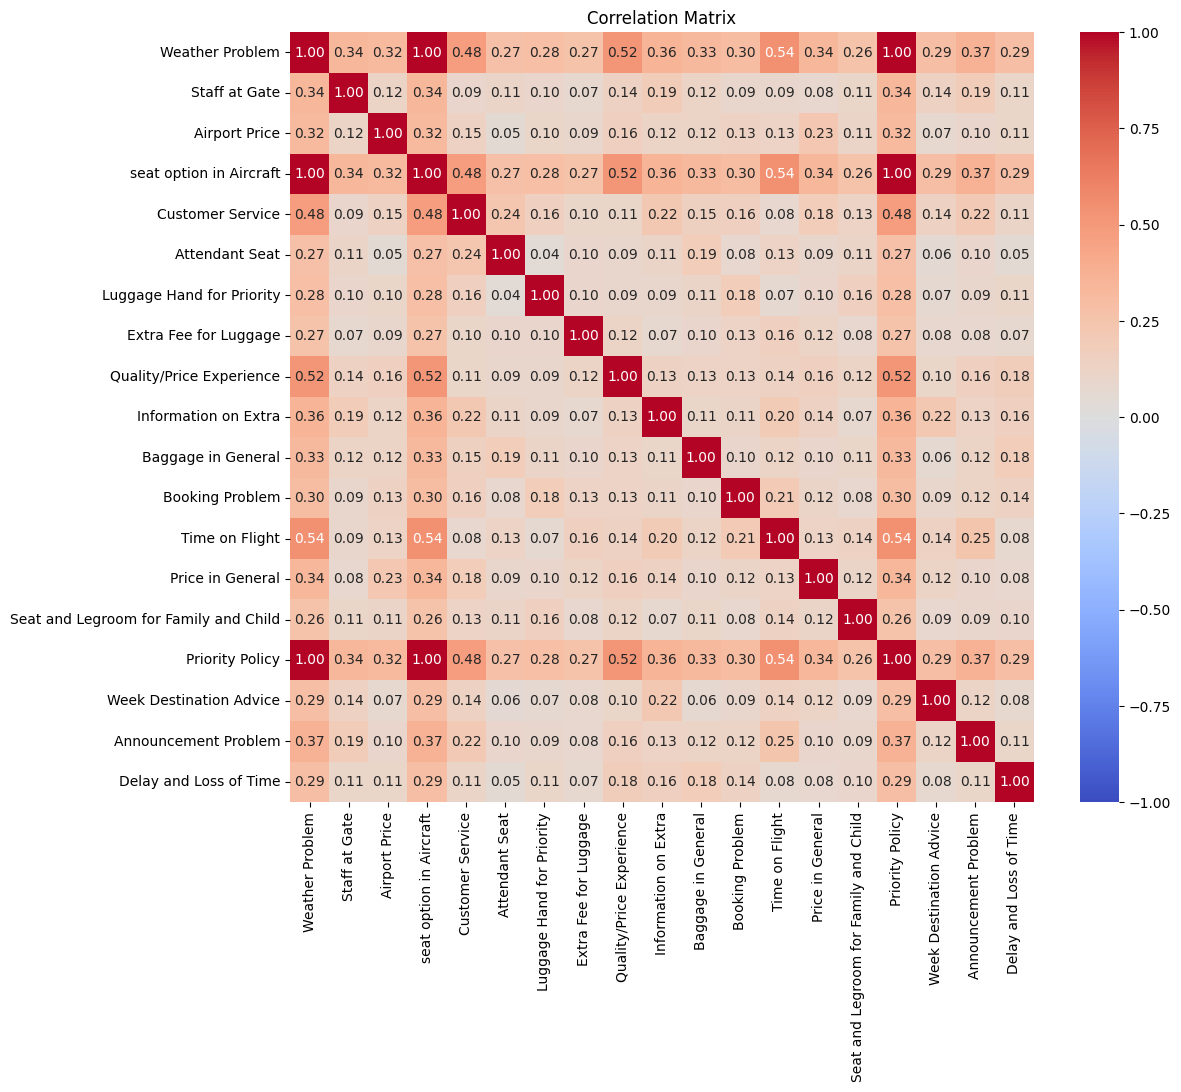


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x00000211BED6A0C0> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x00000211BE50FC40> (for post_execute):



KeyboardInterrupt



In [10]:
topics= list(new_topic_names.values())

# Supponiamo che train_data sia già caricato e contenga tutte le colonne necessarie
# Se train_data contiene tutte le colonne dei topic, filtra le colonne
filtered_data = train_data[topics]

# Calcola la matrice di correlazione
correlation_matrix = filtered_data.corr()

# Visualizza la matrice di correlazione come una mappa di calore
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
correlation_matrix = train_data.corr()

# Crea una mappa di calore per visualizzare la matrice di correlazione
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

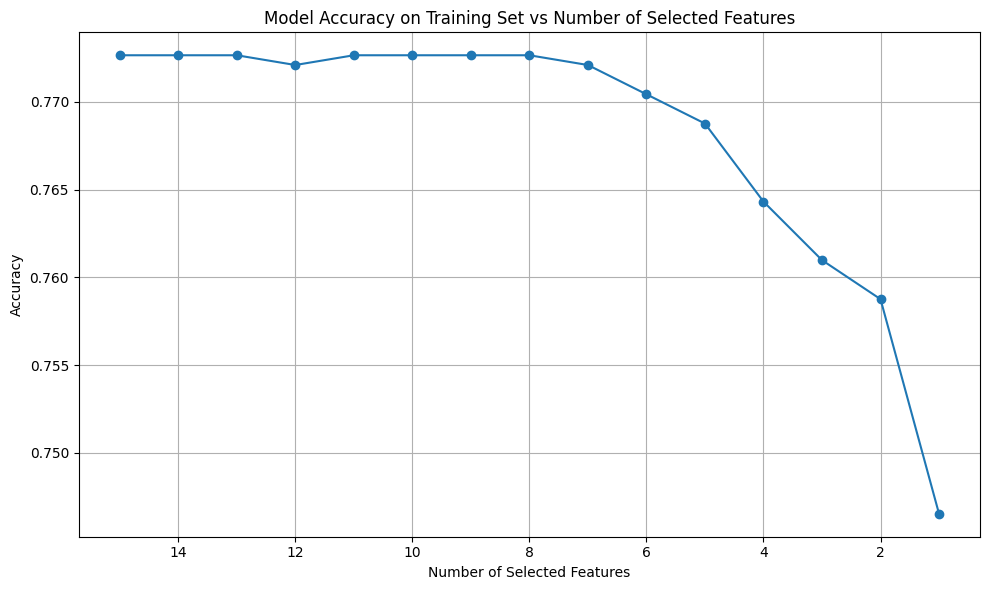

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import make_pipeline

# Concatenate the topic scores with the 'Recommends' variable
X_train = train_data[topics]
y_train = vectorized_df_Bayesian_train['Recommended']
X_test = test_data[topics]
y_test = vectorized_df_Bayesian_test['Recommended']  # Assuming test labels are from `vectorized_df_Bayesian_test`

# Define the range of numbers of features to test (from 15 to 1)
num_features_to_test = np.arange(15, 0, -1)  # Test from 15 to 1 features in descending order

# List to store the accuracies for each number of features
accuracies_train = []

for num_features in num_features_to_test:
    # Define the pipeline with SequentialFeatureSelector and LogisticRegression
    pipeline = make_pipeline(
        SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                                  n_features_to_select=num_features,
                                  direction='forward'),
        LogisticRegression(max_iter=1000)
    )

    # Train the model on the training set
    pipeline.fit(X_train, y_train)

    # Evaluate accuracy on the training set
    y_train_pred = pipeline.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracies_train.append(accuracy_train)

# Plot the accuracy on the training set against the number of selected features
plt.figure(figsize=(10, 6))
plt.plot(num_features_to_test, accuracies_train, marker='o')
plt.title('Model Accuracy on Training Set vs Number of Selected Features')
plt.xlabel('Number of Selected Features')
plt.ylabel('Accuracy')
plt.gca().invert_xaxis()  # Invert the x-axis to show from 15 to 1
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline


# Supponiamo che 'train_data', 'test_data', e 'vectorized_df_Bayesian_train' siano già definiti

# Definiamo X e y
X_train = train_data[topics]
y_train = vectorized_df_Bayesian_train['Recommended'].map({'yes': 1, 'no': 0})
X_test = test_data[topics]
y_test = vectorized_df_Bayesian_test['Recommended'].map({'yes': 1, 'no': 0}) # Assicurati che questo sia corretto

# Definiamo il numero di argomenti da selezionare
num_features = 8

# Definiamo il pipeline con SequentialFeatureSelector e LogisticRegression
pipeline = make_pipeline(
    SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                              n_features_to_select=num_features,
                              direction='forward'),
    LogisticRegression(max_iter=1000)
)

# Addestriamo il modello sul set di addestramento
pipeline.fit(X_train, y_train)

# Estrai i nomi delle feature selezionate
sfs = pipeline.named_steps['sequentialfeatureselector']  # Usa il nome corretto qui
selected_features = X_train.columns[sfs.get_support()]

# Addestra un modello di regressione logistica usando solo le feature selezionate
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Aggiungi una colonna di intercept (costante) per statsmodels
X_train_sm = sm.add_constant(X_train_selected)
X_test_sm = sm.add_constant(X_test_selected)

# Definisci e adatta il modello di regressione logistica con statsmodels
model = sm.Logit(y_train, X_train_sm)
result = model.fit()

# Mostra il summary del modello
print("Summary del Modello di Regressione Logistica:")
print(result.summary())

# Prevediamo sui dati di test
y_pred_prob = result.predict(X_test_sm)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Report di classificazione
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Salva il modello e il pipeline usando joblib
model_filename = 'logistic_regression_pipeline.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(pipeline, file)
print(f"Modello salvato come {model_filename}")

Optimization terminated successfully.
         Current function value: 0.500971
         Iterations 7
Summary del Modello di Regressione Logistica:
                           Logit Regression Results                           
Dep. Variable:            Recommended   No. Observations:                 1799
Model:                          Logit   Df Residuals:                     1790
Method:                           MLE   Df Model:                            8
Date:                Mon, 22 Jul 2024   Pseudo R-squ.:                  0.2529
Time:                        14:29:11   Log-Likelihood:                -901.25
converged:                       True   LL-Null:                       -1206.3
Covariance Type:            nonrobust   LLR p-value:                1.540e-126
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const   

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85       287
           1       0.80      0.58      0.67       163

    accuracy                           0.80       450
   macro avg       0.80      0.75      0.76       450
weighted avg       0.80      0.80      0.79       450

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       287
           1       0.86      0.83      0.84       163

    accuracy                           0.89       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.89      0.89      0.89       450

ROC AUC Logistic Regression: 0.84
ROC AUC Naive Bayes: 0.93


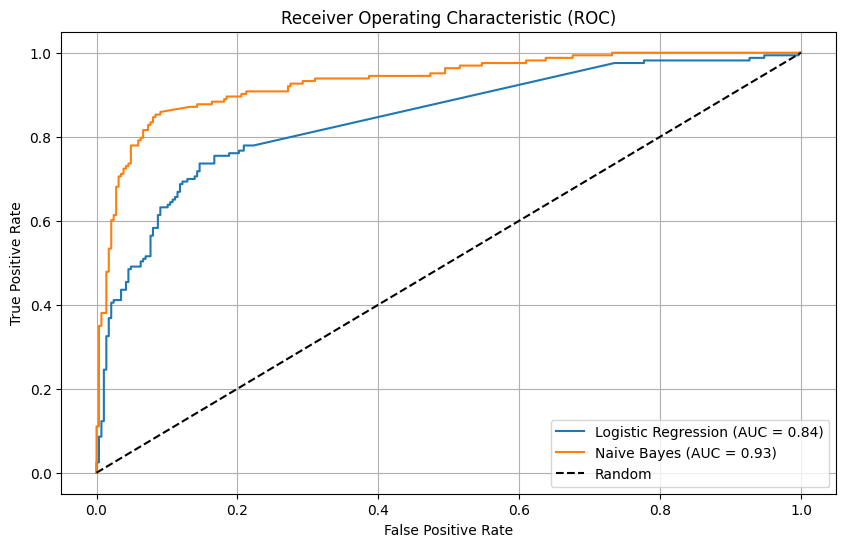

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

# Define X and y for Logistic Regression
X_train = train_data[topics]
y_train = vectorized_df_Bayesian_train['Recommended'].map({'yes': 1, 'no': 0})
X_test = test_data[topics]
y_test = vectorized_df_Bayesian_test['Recommended'].map({'yes': 1, 'no': 0})  # Check if this is correct

# Define X and y for Naive Bayes
# Make sure these variables are correctly defined
X_Bayesian_train = X_Bayesian_train_vector  # Check these variables
X_Bayesian_test = X_Bayesian_test_vector
y_Bayesian_train = train_df['Recommended'].map({'yes': 1, 'no': 0})  # Check these variables
y_Bayesian_test = test_df['Recommended'].map({'yes': 1, 'no': 0})

# Logistic Regression with feature selection
num_features = 8
pipeline_logistic = make_pipeline(
    SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000),
                              n_features_to_select=num_features,
                              direction='forward'),
    LogisticRegression(max_iter=1000)
)

pipeline_logistic.fit(X_train, y_train)

# Predictions with Logistic Regression
y_pred_logistic = pipeline_logistic.predict(X_test)
y_prob_logistic = pipeline_logistic.predict_proba(X_test)[:, 1]

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_Bayesian_train, y_Bayesian_train)

# Predictions with Naive Bayes
y_pred_nb = nb_model.predict(X_Bayesian_test)
y_prob_nb = nb_model.predict_proba(X_Bayesian_test)[:, 1]

# Evaluation metrics
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logistic))

print("Naive Bayes Classification Report:")
print(classification_report(y_Bayesian_test, y_pred_nb))

# ROC AUC
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_nb = roc_auc_score(y_Bayesian_test, y_prob_nb)

print(f'ROC AUC Logistic Regression: {roc_auc_logistic:.2f}')
print(f'ROC AUC Naive Bayes: {roc_auc_nb:.2f}')

# ROC Curve
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
fpr_nb, tpr_nb, _ = roc_curve(y_Bayesian_test, y_prob_nb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()


Logistic Regression Cross-Validation Accuracy: 0.768 ± 0.008
Naive Bayes Cross-Validation Accuracy: 0.840 ± 0.014
Optimization terminated successfully.
         Current function value: 0.493847
         Iterations 7


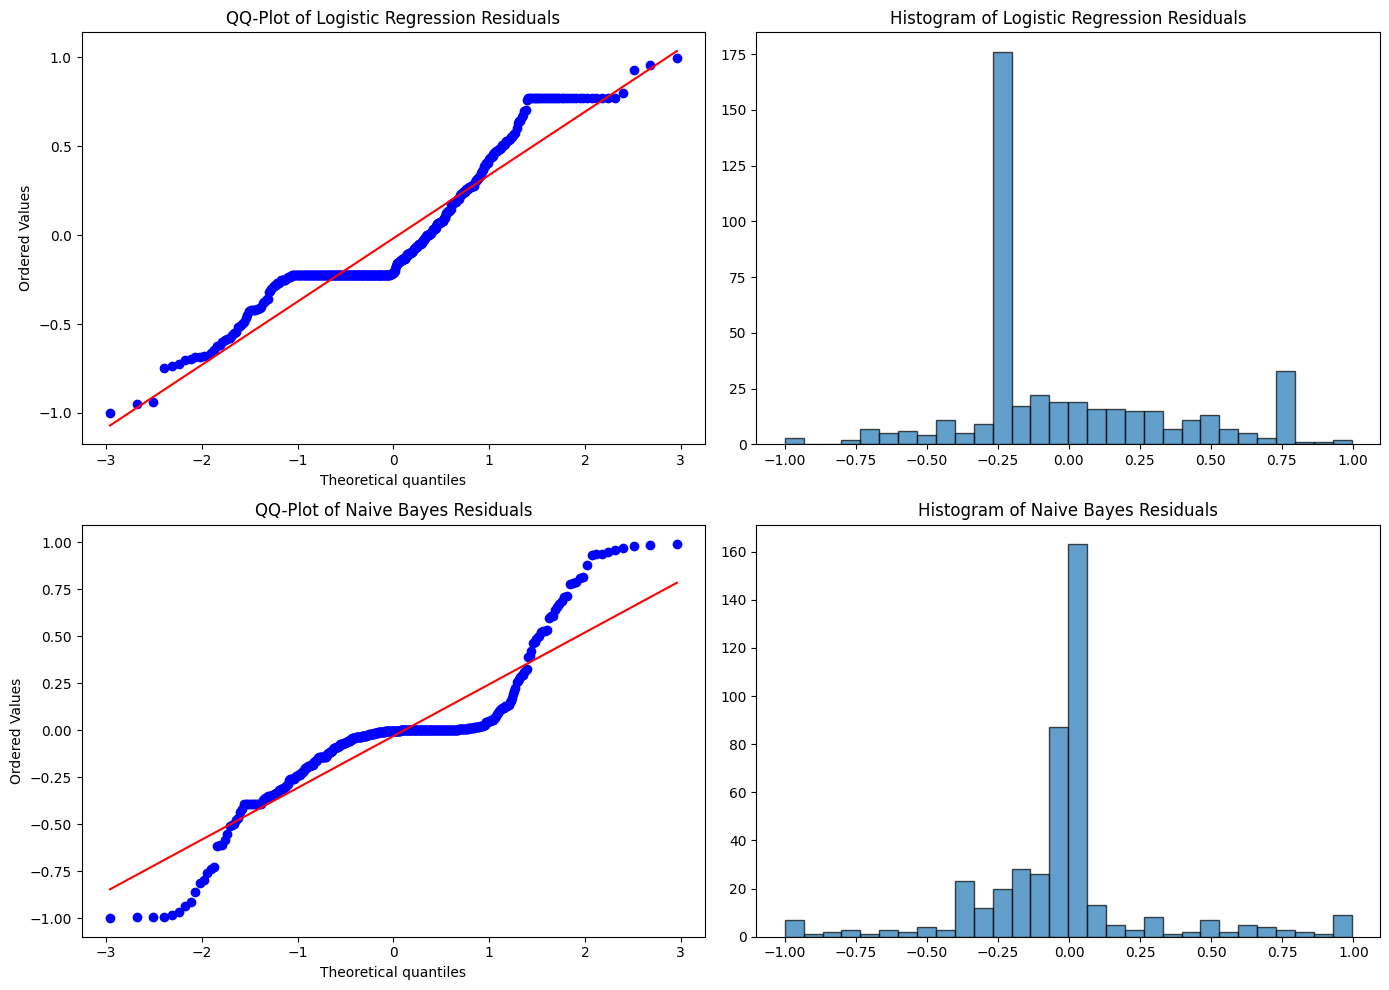

Wilcoxon test statistic: 49288.000
Wilcoxon test p-value: 0.599


In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from scipy.stats import shapiro, wilcoxon
import matplotlib.pyplot as plt
import scipy.stats as stats
# Cross-Validation
cv_scores_logistic = cross_val_score(pipeline_logistic, X_train, y_train, cv=5, scoring='accuracy')
cv_scores_nb = cross_val_score(nb_model, X_Bayesian_train, y_Bayesian_train, cv=5, scoring='accuracy')

print(f'Logistic Regression Cross-Validation Accuracy: {np.mean(cv_scores_logistic):.3f} ± {np.std(cv_scores_logistic):.3f}')
print(f'Naive Bayes Cross-Validation Accuracy: {np.mean(cv_scores_nb):.3f} ± {np.std(cv_scores_nb):.3f}')

# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Define and fit the logistic regression model with statsmodels
model = sm.Logit(y_train, X_train_sm)
result = model.fit()

# Residuals for Logistic Regression
y_pred_prob_sm = result.predict(X_test_sm)
residuals = y_test - y_pred_prob_sm

# Residuals for Naive Bayes
y_pred_prob_nb = nb_model.predict_proba(X_Bayesian_test)[:, 1]
residuals_nb = y_Bayesian_test - y_pred_prob_nb

# Shapiro-Wilk Test for Normality
stat_sm, p_value_sm = shapiro(residuals)
stat_nb, p_value_nb = shapiro(residuals_nb)
# Plotting QQ-plots and Histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# QQ-Plot for Logistic Regression Residuals
stats.probplot(residuals, dist="norm", plot=axes[0, 0])
axes[0, 0].set_title('QQ-Plot of Logistic Regression Residuals')

# Histogram for Logistic Regression Residuals
axes[0, 1].hist(residuals, bins=30, edgecolor='k', alpha=0.7)
axes[0, 1].set_title('Histogram of Logistic Regression Residuals')

# QQ-Plot for Naive Bayes Residuals
stats.probplot(residuals_nb, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('QQ-Plot of Naive Bayes Residuals')

# Histogram for Naive Bayes Residuals
axes[1, 1].hist(residuals_nb, bins=30, edgecolor='k', alpha=0.7)
axes[1, 1].set_title('Histogram of Naive Bayes Residuals')

plt.tight_layout()
plt.show()

# Wilcoxon Test on Residuals
stat, p_value = wilcoxon(residuals, residuals_nb)

print(f'Wilcoxon test statistic: {stat:.3f}')
print(f'Wilcoxon test p-value: {p_value:.3f}')

In [ ]:
import pandas as pd

# Supponiamo che 'train_data' e 'test_data' siano i DataFrame di addestramento e test
# e 'selected_features' contenga le colonne con i topic calcolati

# Seleziona solo le colonne dei topic calcolati (selected_features) dai dati di addestramento e di test
train_data_selected = train_data[selected_features]
test_data_selected = test_data[selected_features]

# Aggiungi una colonna per indicare se il dato proviene dal training o dal test set (opzionale)
train_data_selected['Source'] = 'Train'
test_data_selected['Source'] = 'Test'

# Unisci i dati di addestramento e di test
df_combined = pd.concat([train_data_selected, test_data_selected], axis=0)

# Se il DataFrame originale 'df' contiene colonne da aggiungere a 'df_combined':
# Unisci df_combined con df basandoti sull'indice, supponendo che abbiano lo stesso numero di righe
# Verifica se 'df' contiene le righe giuste e usa 'join' invece di 'concat' per allineare le righe
df_combined = df_combined.reset_index(drop=True)  # Assicurati che gli indici siano allineati
df = df.reset_index(drop=True)  # Assicurati che gli indici siano allineati
df_combined = pd.concat([df, df_combined], axis=1)

# Salva il DataFrame combinato come file CSV
df_combined.to_csv('ryanair_customer_satisfaction.csv', index=False)

print("Il DataFrame combinato è stato salvato come 'ryanair_customer_satisfaction.csv'")
